# 6.S083 / 18.S190 Spring 2020: Problem set 3

Submission deadline: Tuesday April 21, 2020 at 11:59pm.


In this problem set, we will develop our first proper model that exhibits an **epidemic
outbreak**.

We will develop a **stochastic** (probabilistic) model of an infection propagating in a population  that is **well mixed**, i.e. in which everyone is in contact with everyone else.
An example of this would be a small school or university in which people are
constantly moving around and interacting with each other.

As usual, we will make modelling assumptions that allow us to reach the goal as fast and simply as possible.

The model is an **individual-based** or **agent-based** model -- in other words,
we explicitly keep track of each individual in the population and what their
infection status is. However, we will not keep track of their position in space;
we will just assume that there is some mechanism by which they interact with
other individuals which we do not include in the model (for now).

## Exercise 1: Modelling the spread of an infection or rumour

In this exercise we will model the spread of an infection or rumour in which
there is no recovery via a stochastic model, which we will implement in a Monte Carlo
simulation (i.e. a simulation that involves generating random numbers).

We will call the individuals **agents**.


1. Julia has a data type called an [**enumerated type**](https://en.wikipedia.org/wiki/Enumerated_type). Variables of this type can only take one of a pre-defined set of values; we will use this to model the possible internal state of an agent.

    The code to define an enum is as follows:

    ```julia
    @enum InfectionStatus S I R
    ```

    This defines a new type `InfectionStatus`, as well as names `S`, `I` and `R` that are the only possible values that a variable of this type can take.

    Define a variable `x` equal to `S`. What is its type?

2. Convert `x` to an integer using the `Int` function. What value does it have? What values do `I` and `R` have?

3. Take $N=100$. Make an array `agents` whose $i$th entry is the status of agent
number $i$. Make them all initially susceptible.

4. Now choose a single agent at random and make it infectious. (Hint: Use the
    `rand` function with a range to choose the index of the infectious agent.)

5. Write a function `step!` that takes a `Vector` `agents` and a probability `p_I`
as arguments.  This function may *modify* the content of `agents` to implement one step of the infection dynamics.

    1. Choose an agent $i$ at random.
    2. If $i$ is not infectious then nothing happens on this step so you can just `return`
 from the function.
     3. Choose another agent $j$ at random. Make sure that $i \neq j$. To do so, repeat this
    choice *until* $i \neq j$.
    4. If $j$ is not infected then $i$ infects $j$ with probability $p_I$.

6. Write a function `sweep!`. It runs `step!` $N$ times, where $N$ is the number of agents. Thus each agent acts, on average, once per sweep. One sweep is thus the unit
of time in our Monte Carlo simulation.

7. Write a function `infection_simulation`. It should take $N$ and $p_I$ as arguments,
as well as $T$, the total number of steps.

    1. First generate the `Vector` `agents` of length $N$ and a `Vector` `Is` to store
    the number of infectious individuals at each step.

    2. Run `sweep!` a number $T$ of times. Calculate the total number of infectious
    agents at the end of each step and store that number in `Is`.

    3. Return `Is` as the output of the function.

8. Run your simulation 50 times with $N=100$ and collect the data in a `Vector` of `Vector`s called `results`, using $p_I = 0.02$ and $T = 1000$.

    Plot each of the 50 graphs on the same plot using transparency 0.5.

9. Calculate the mean trajectory using the `mean` function applied to `results`. [This "just works" since `mean` is implmented in a generic way!] Add it to the plot using a heavier line.

10. Calculate the standard deviation $\sigma$ of $I$ at each step. [This should thus be a *vector.] Add this to the plot using **error bars**, using the option `yerr=σ` in the plot command; use transparency.

    This should confirm that the distribution of $I$ at each step is pretty wide!

9. You should see that the mean behaves in a similar way to what we saw in lectures using a *deterministic* model. So what is the deterministic model possibly describing, in terms of the stochastic model?

### 1.

In [1]:
@enum InfectionStatus S I R

In [2]:
x = S

S::InfectionStatus = 0

`x` is of type `InfectionStatus`.

### 2.

In [3]:
@show Int(x)
@show Int(I)
@show Int(R);

Int(x) = 0
Int(I) = 1
Int(R) = 2


### 3.

In [4]:
N = 100
agents = [S for _ in 1:N];

### 4.

In [5]:
infected_index = rand(1:N)

2

In [6]:
agents[infected_index] = I;

### 5. 

In [7]:
"""
    step!(agents::Vector{InfectionStatus}, p_I::Float64)

Select a random agent in `agents` and, if they are infectious, 
infect another random agent with probability `p_I`.
"""
function step!(agents::Vector{InfectionStatus}, p_I::Float64)
    i = rand(1:N)
    if agents[i] != I  # i not infectious, just return
        return
    end
    j = i
    while j == i
        j = rand(1:N)
    end
    if agents[j] == S && rand() < p_I  # j is susceptible, infect with given probability
        agents[j] = I
    end
    return
end

step!

### 6.

In [8]:
"""
    sweep!(agents::Vector{InfectionStatus}, p_I::Float64)

Once for every agent in `agents`, picks a random agent and, if they are
infectious, infects another random agent with probability `p_I`. Represents
one unit of time in the Monte Carlo simulation.
"""
function sweep!(agents::Vector{InfectionStatus}, p_I::Float64)
    for i in 1:length(agents)
        step!(agents, p_I)
    end
end

sweep!

In [9]:
"""
    infection_simulation(N::Int, p_I::Float64, T::Int)

Runs a simple infection simulation, with `N` agents where 1 is infectious at the beginning, 
where each agent has probability `p_I` of infecting another at a given time step when 
infectious. Runs `T` time steps total. Returns a vector of length `T`, containing the number 
of infectious agents at each time step.
"""
function infection_simulation(N::Int, p_I::Float64, T::Int)
    agents = [S for _ in 1:N]
    agents[rand(1:N)] = I  # randomly infect one agent
    Is = Int64[]  # don't include time step 0
    for _ in 1:T
        sweep!(agents, p_I)
        push!(Is, count(agent -> agent == I, agents))  # add current infected count to Is
    end
    return Is
end

infection_simulation

### 8.

In [10]:
N = 100; p_I = 0.02; T = 1000; num_sims = 50
results = [infection_simulation(N, p_I, T) for _ in 1:num_sims];

In [11]:
using Plots; using Statistics

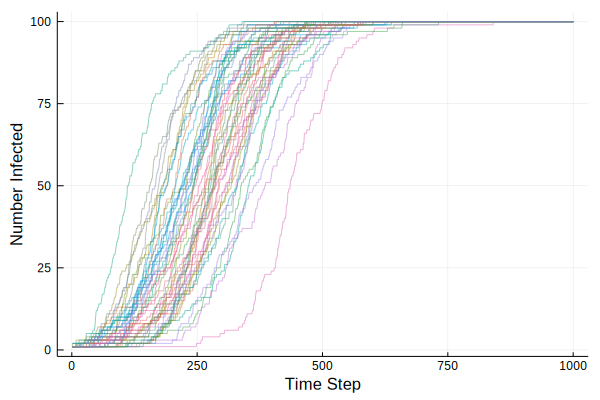

In [12]:
p₁ = plot(
    results; 
    ylabel="Number Infected",
    xlabel="Time Step",
    labels = ["" for _ in 1:1, _ in 1:length(results)],
    alpha=0.5
)

### 9.

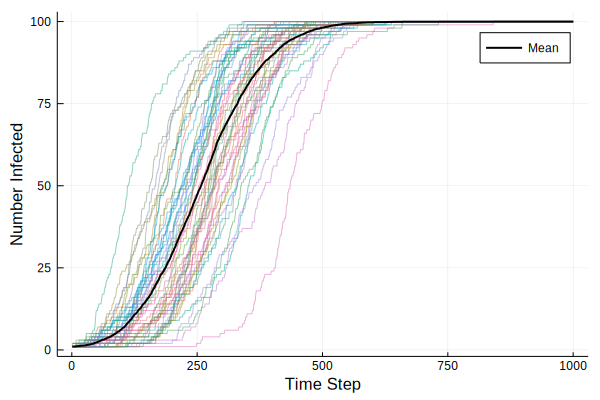

In [13]:
plot!(p₁, mean(results); alpha=1, w=2, c=:black, label="Mean")

### 10.

In [14]:
σ = [std([results[i][j] for i in 1:num_sims]) for j in 1:T];

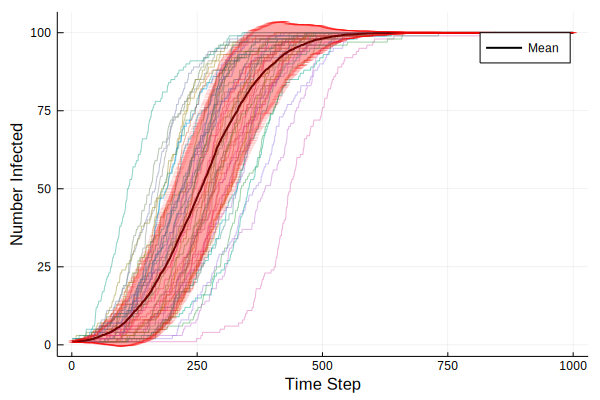

In [15]:
plot!(p₁, mean(results); yerr=σ, alpha=0.2, c=:red, label="")

### 11.
The deterministic model is most likely describing the expected behavior of the stochastic model.

## Exercise 2: Agent type

Suppose we want to track more information about each agent, e.g. how many other agents were infected by that agent. We could just create an additional array with that information in, but we will need to pass that around and will start to lose track of what belongs together.

Instead a good solution is to define a custom composite type.


1. Define a mutable type `Agent` as follows:

    ```jl
    mutable struct Agent
        status::InfectionStatus
        num_infected::Int
    end
    ```

2. Define a method of the constructor of `Agent` that takes no arguments and sets the status to `S` and
the number infected to 0.

3. Make an array `agents` of `Agent`s. Set the first one's infection status to `I`.

4. Rewrite your code from Exercise 1 to use the new `Agent` type. Now when your functions accept an `agents`
vector, they should assume that that represents a `Vector` of `Agent` objects.

    You can enforce this using a function signature like

    ```jl
    function f(agents::Vector{Agent})
    end
    ```

5. Update an agent's `num_infected` field whenever it infects another agent.

6. At the end of the simulation, extract the probability distribution of the "number of agents infected", using your code from Exercise 1 of Problem Set 2.

7. Plot the probability distribution. What kind of distribution does it seem to be? You will need to think about how to visualize this.

### 1.

In [16]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end

### 2.

In [17]:
Agent() = Agent(S, 0)

Agent

### 3-6.

In [18]:
"""
    step!(agents::Vector{Agent}, p_I::Float64)

Select a random agent in `agents` and, if they are infectious, 
infect another random agent with probability `p_I`.
"""
function step!(agents::Vector{Agent}, p_I::Float64)
    i = rand(1:N)
    if agents[i].status != I  # i not infectious, just return
        return
    end
    j = i
    while j == i
        j = rand(1:N)
    end
    if agents[j].status == S && rand() < p_I  # j is susceptible, infect with given probability
        agents[j].status = I
        agents[i].num_infected += 1  # addresses problem 4
    end
    return
end

step!

In [19]:
"""
    sweep!(agents::Vector{Agent}, p_I::Float64)

Once for every agent in `agents`, picks a random agent and, if they are
infectious, infects another random agent with probability `p_I`. Represents
one unit of time in the Monte Carlo simulation.
"""
function sweep!(agents::Vector{Agent}, p_I::Float64)
    for i in 1:length(agents)
        step!(agents, p_I)
    end
end

sweep!

In [20]:
# importing code from PS2

"""
    counts(data::Vector{Int})

Returns a tuple of lists, where the first is a sorted list of every 
unique element of `data` and the second is their corresponding counts. 
"""
function counts(data::Vector{Int})
    count_map = Dict{Int, Int}()
    for num in data
        count_map[num] = get(count_map, num, 0) + 1
    end
    ks = collect(keys(count_map))
    vs = collect(values(count_map))
    p = sortperm(ks)
    return ks[p], vs[p]
end

"""
    probability_distribution(data::Vector{Int})

Returns a tuple of lists, where the first is a sorted list of every
unique element of `data` and the second is their corresponding experimental
probabilities (number of times they occur in `data` over length of `data`)
"""
function probability_distribution(data::Vector{Int})
    ks, vs = counts(data)
    return ks, vs ./ sum(vs)
end

probability_distribution

In [21]:
N = 100

100

In [22]:
"""
    num_infected_dist_simulation(N::Int, p_I::Float64, T::Int)

Runs a simple infection simulation, with `N` agents where 1 is infectious at the beginning, 
where each agent has probability `p_I` of infecting another at a given time step when 
infectious. Runs `T` time steps total. Returns a vector of length `T`, containing the number 
of infectious agents at each time step.
"""
function num_infected_dist_simulation(N::Int, p_I::Float64, T::Int)
    agents = [Agent() for _ in 1:N]
    agents[rand(1:N)].status = I  # randomly infect one agent
    for _ in 1:T
        sweep!(agents, p_I)
    end
    infected_counts = [agent.num_infected for agent in agents]
    return probability_distribution(infected_counts)
end

num_infected_dist_simulation

### 6.

In [23]:
"""
    avg_prob_distributions(dists)

Given a vector of probability distributions (as returned by [probability_distribution](@ref)), 
calculates the mean distribution.
"""
function avg_prob_distribution(dists::Vector{Tuple{Vector{Int}, Vector{Float64}}})
    max_val = maximum(reduce(vcat, [dist[1] for dist in dists]))
    mean_dist = zeros(Float64, max_val + 1)
    for (counts, probs) in dists
        for (count, prob) in zip(counts, probs)
            mean_dist[count + 1] = get(mean_dist, count + 1, 0) + prob
        end
    end
    return collect(0:max_val), mean_dist ./ num_sims  # normalize counts
end

avg_prob_distribution

In [24]:
N = 100; p_I = 0.02; T = 1000; num_sims = 50
dists = [num_infected_dist_simulation(N, p_I, T) for _ in 1:num_sims]
avg_dist = avg_prob_distribution(dists);

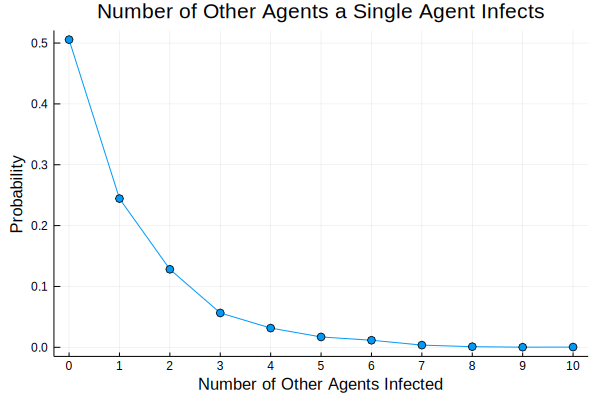

In [25]:
p₂ = plot(
    avg_dist;
    title="Number of Other Agents a Single Agent Infects",
    xlabel="Number of Other Agents Infected",
    ylabel="Probability",
    xticks=0:maximum(avg_dist[1]),
    m=:o,
    legend=false
)

This distribution seems to be geometric (0.5, 0.25, 0.125, ...). 

## Exercise 3: Epidemic model

1. Add recovery to your model using an additional
parameter `p_R` in the `step!` and related functions.
Each agent should check if it is infected, and if so
it recovers with probability $p_R$ at each step.

    The function `simulation` should return vectors `Ss`, `Is` and `Rs` giving the time evolution of the numbers of $S$, $I$ and $R$, as well as the probability distribution of number of people infected.

2. Run the simulation with $N=1000$, $p_I = 0.1$ and $p_R = 0.01$ for time $T=1000$. Plot $S$, $I$ and $R$ as a function of time. You should see graphs that look familiar from the internet, with an epidemic outbreak, i.e. a significant fraction of infectious agents after a short time, which then recover.

3. Plot the distribution of `num_infected`. Does it have a recognisable shape?

4. Run the simulation 50 times and plot $I$ as a function of time for each, together with the mean over the 50 simulations (as you did in Exercise 2).

5. Describe 3 ways in which you could characterize the magnitude of the epidemic. Find these quantities for one of the runs of your simulation.

### 1.

In [26]:
"""
    step!(agents::Vector{Agent}, p_I::Float64)

Select a random agent in `agents` and, if they are infectious, 
infect another random agent with probability `p_I`. This infected
agent then recovers with probability `p_R`.
"""
function step!(agents::Vector{Agent}, p_I::Float64, p_R::Float64)
    i = rand(1:N)
    if agents[i].status != I  # i not infectious, just return
        return
    end
    j = i
    while j == i
        j = rand(1:N)
    end
    if agents[j].status == S && rand() < p_I  # j is susceptible, infect with given probability
        agents[j].status = I
        agents[i].num_infected += 1
    end
    if rand() < p_R  # infectious agent recovers with probability p_R
        agents[i].status = R
    end
    return
end

step!

In [27]:
"""
    sweep!(agents::Vector{Agent}, p_I::Float64, p_R::Float64)

Once for every agent in `agents`, picks a random agent and, if they are
infectious, infects another random agent with probability `p_I`, then recovers
with probability `p_R`. Represents one unit of time in the Monte Carlo 
simulation.
"""
function sweep!(agents::Vector{Agent}, p_I::Float64, p_R::Float64)
    for i in 1:length(agents)
        step!(agents, p_I, p_R)
    end
end

sweep!

In [28]:
"""
    simulation_with_recovery(N::Int, p_I::Float64, p_R::Float64, T::Int)

Runs a pandemic simulation with `N` agents, where at each time step an infected
agent infects another with probability `p_I`, and recovers with probability
`p_R`. Runs for `T` time steps total.

Returns a tuple `(Ss, Is, Rs, dist)`, where the first three are vectors of length `T` with the
count of agents in each state at each time step, and `dist` is a probability 
distribution (as returned by [probability_distribution](@ref)) for the number
of others a single agent infected.
"""
function simulation_with_recovery(N::Int, p_I::Float64, p_R::Float64, T::Int)
    agents = [Agent() for _ in 1:N]
    agents[rand(1:N)].status = I  # randomly infect one agent
    Ss, Is, Rs = Int64[], Int64[], Int64[]
    for _ in 1:T
        sweep!(agents, p_I, p_R)
        for (status, counts) in zip([S, I, R], [Ss, Is, Rs])
            push!(counts, count(agent -> agent.status == status, agents))
        end
    end
    infected_counts = [agent.num_infected for agent in agents]
    return Ss, Is, Rs, probability_distribution(infected_counts)
end

simulation_with_recovery

### 2.

In [29]:
N = 1000; p_I = 0.1; p_R = 0.01; T = 1000
Ss, Is, Rs, num_infected_dist = simulation_with_recovery(N, p_I, p_R, T);

First I'll make a normal plot:

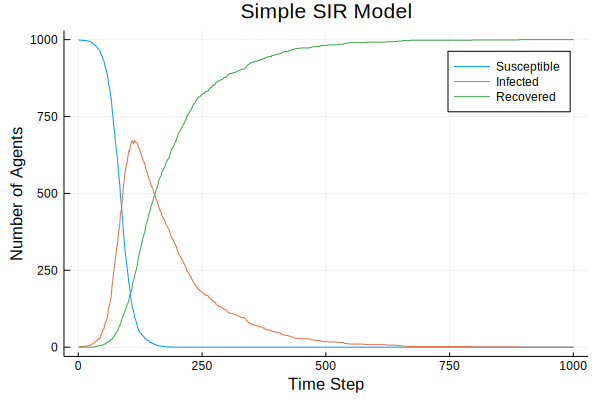

In [30]:
p₃ = plot(
    [Ss Is Rs];
    labels=["Susceptible" "Infected" "Recovered"],
    xlabel="Time Step",
    ylabel="Number of Agents",
    title="Simple SIR Model"
)

Now I'll make a plot with the counts stacked, to add up to 1,000:

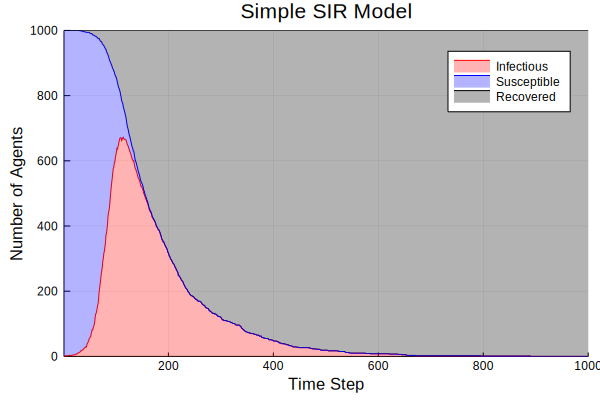

In [31]:
p₄ = areaplot(
    [Is Ss Rs]; 
    seriescolor = [:red :blue :black], 
    label = ["Infectious" "Susceptible" "Recovered"],
    fillalpha = [0.3 0.3 0.3],
    xlims=(1, length(Ss)),
    ylims=(0, N),
    xlabel="Time Step",
    ylabel="Number of Agents",
    title="Simple SIR Model"
)

### 3.

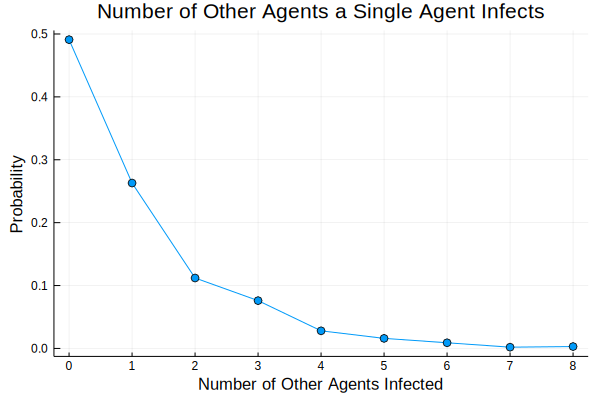

In [32]:
p₅ = plot(
    num_infected_dist;
    title="Number of Other Agents a Single Agent Infects",
    xlabel="Number of Other Agents Infected",
    ylabel="Probability",
    xticks=0:maximum(num_infected_dist[1]),
    m=:o,
    legend=false
)

Again, this distribution looks approximately geometric, with multiplicative factor $0.5$.

### 4.

In [33]:
num_sims = 50
multiple_sim_is = [simulation_with_recovery(N, p_I, p_R, T)[2] for _ in 1:num_sims];

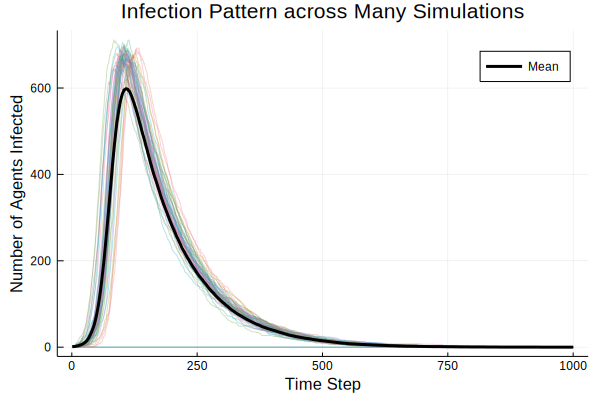

In [34]:
p₆ = plot(
    multiple_sim_is;
    alpha=0.3,
    labels = ["" for _ in 1:1, _ in 1:length(multiple_sim_is)],
    xlabel="Time Step",
    ylabel="Number of Agents Infected",
    title="Infection Pattern across Many Simulations"
)
plot!(p₆, mean(multiple_sim_is); label="Mean", w=3, color=:black)

### 5. 

Ways to characterize the magnitude of the epidemic:
 1. Peak proportion of the population that was infected
 2. Proportion of the population that recovered from the infection
 3. Peak number infected per day

In [36]:
_, Is, Rs, _ = simulation_with_recovery(N, p_I, p_R, T);
peak_proportion_infected = maximum(Is) / N
proportion_of_population_recovered = Rs[end] / N
peak_infections_per_day = maximum([Is[i + 1] - Is[i] for i in 1:length(Is) - 1])
@show peak_proportion_infected
@show proportion_of_population_recovered
@show peak_infections_per_day;

peak_proportion_infected = 0.697
proportion_of_population_recovered = 1.0
peak_infections_per_day = 24
